In [52]:
%matplotlib notebook
from forschungspraktikum.jiles_atherton.functions import get_gradient, jiles_atherton_H, get_cost
from scipy.optimize import minimize
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import mu_0

In [53]:
# Beispielparameter des Jiles-Atherton-Modells
alpha = 0.001
a = 110.5
k = 30.0
c = 0.4
Msat = 1.35e5

params = [alpha, a, Msat, k, c]

# Eingangsgrößen
r = 2.0e-2 # m, Radius
i_hat = 25.0 # A, Strom
f = 1000.0 # Hz, Frequenz
n = 3 # Anzahl Perioden
n_p = 512# Datenpunkte pro Periode


In [54]:
t = np.arange(n * n_p)/(n_p*f) # Zeitvektor
current = i_hat*np.cos(2*np.pi*f*t) # Stromvorgabe
H = current/(2*np.pi*r) # Resultierende Feldvorgabe

In [124]:
p_test = [alpha*3, a-10, Msat-1.0e5, k, c+0.5]

M_test = np.array(jiles_atherton_H(H, t, p_test)) + 5*np.random.normal(0.0, 100.0, int(t.size/2))

In [183]:
def function_to_optimize(x):
    return get_cost(H, t, M_test, x)

def grad(x):
    return np.array(get_gradient(H, t, M_test, x))

def callback(x):
    pass#print(x)

res = minimize(function_to_optimize, params, 
               method='TNC', options={'maxiter': 10000, 'disp': True}, 
               callback=callback,
               jac=grad,
               tol=1.0e-6,
               bounds = [(0, None), (0, None), (0, None), (0, None), (0, None)]
              )


In [184]:
print(res)

     fun: 58531.47195356693
     jac: array([ 2.80301400e-03,  7.77355281e-04, -4.30804242e-08,  2.03527636e-03,
        2.17166046e-01])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 151
     nit: 42
  status: 1
 success: True
       x: array([3.24706768e-03, 1.03938585e+02, 3.52302396e+04, 2.89319923e+01,
       8.86349107e-01])


In [185]:
M = jiles_atherton_H(H, t, p_test)
M_ = jiles_atherton_H(H, t, res.x)
M_i = jiles_atherton_H(H, t, params)

<IPython.core.display.Javascript object>


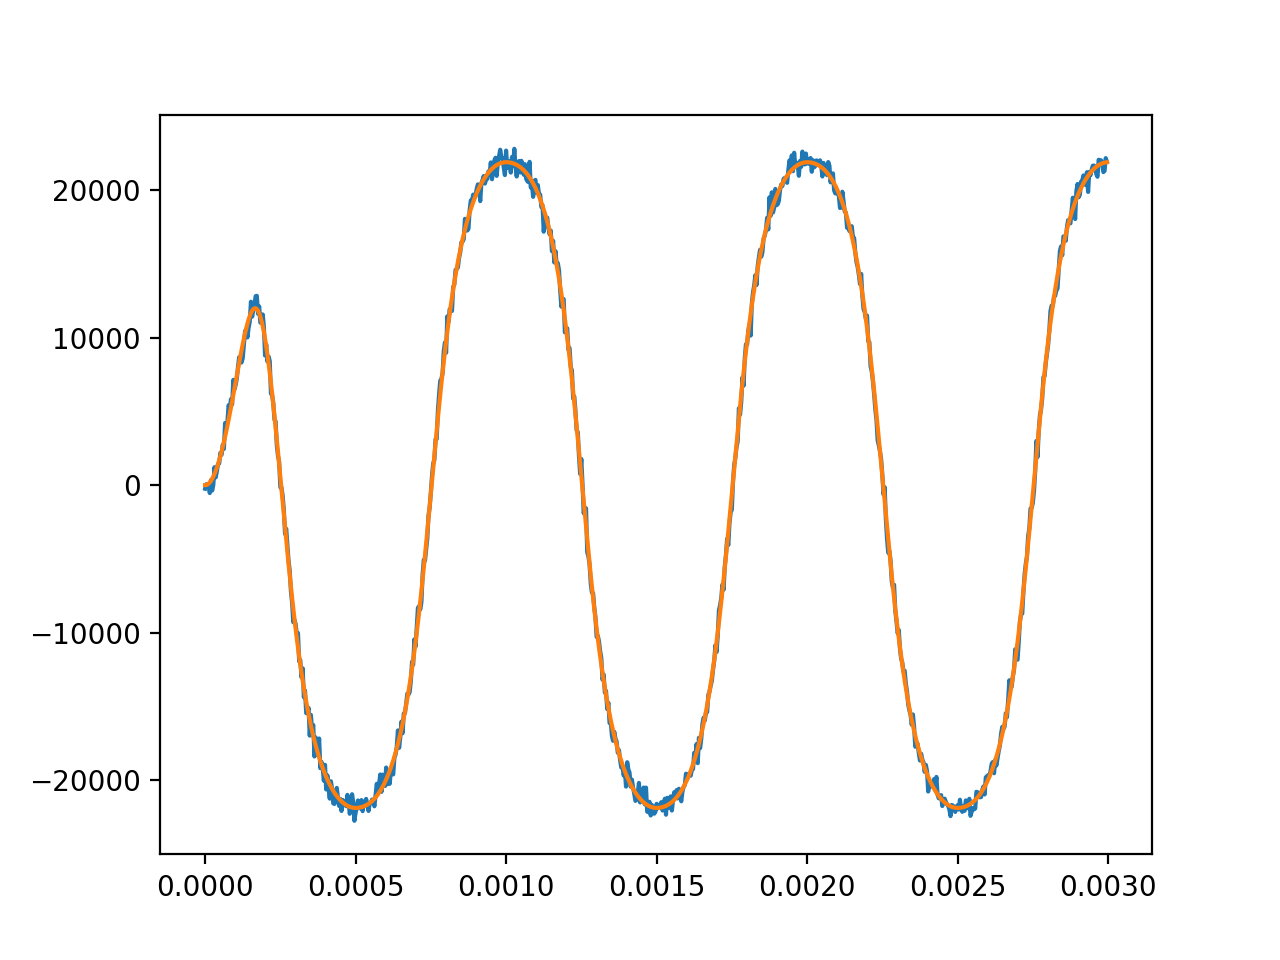

In [182]:
plt.plot(t[::2], M_test)
plt.plot(t[::2], M_)
#plt.plot(t[::2], M_i)
plt.show()

In [170]:
res_ = np.array(res.x)
p_test_ = np.array(p_test)
print(res_, p_test)
print(np.abs((1 - res_/p_test_)))

[3.25343451e-03 1.04019451e+02 3.52341915e+04 2.88460797e+01
 8.85972699e-01] [0.003, 100.5, 35000.0, 30.0, 0.9]
[0.08447817 0.03501941 0.00669119 0.03846401 0.01558589]
